### here we want to plot density evolution over the radius at particular times, t0, tform/2, tform and tend. 
### first we need to calculate density across the radius for each time individually. for this, we need to read X,Y and Z columns from ascii output file (ssplash to ascii), calculate r in cylindrical coordinate, then split r in parts (here 100 splits). Then we should read and add up mass in every split seperately.  then we should change mass into the physical unit and calculate density in a cross section of the filament (here 0.02 pc and 0.2 pc), by dividing mass over volume at related radius. now we have our density files to plot. After all we need to fit density at tend

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from astropy import constants as const
from astropy import units as u

In [43]:
input_file=open('./density_across_r_plot/N450M37rho15h120_00120.ascii','r')
#input_file=open('./density_across_r_plot/N450M37rho15h120B57_00000.ascii','r')
#input_file=open('./density_across_r_plot/N450M37rho15h120B57_00021.ascii','r')
#input_file=open('./density_across_r_plot/N450M37rho15h120B57_00061.ascii','r')
#input_file=open('./density_across_r_plot/N450M37rho15h120B57_00074.ascii','r')

In [44]:
X, Y, Z = np.loadtxt(input_file,unpack=True, usecols=(0,1,2))

In [45]:
X

array([-3.1199645e-02, -1.1856625e-02,  6.1402582e-03, ...,
        3.4037828e-06, -3.6951649e-05, -1.9559848e-05])

In [46]:
Y

array([-2.3435766e-01, -2.1512766e-01, -2.1889159e-01, ...,
        5.0442241e-06, -5.5606552e-06,  4.9925698e-06])

In [47]:
Z

array([-6.6548830e-01, -6.6142672e-01, -6.3356286e-01, ...,
       -1.7685680e-01,  1.7691678e-01, -1.6329302e-04])

In [48]:
#Pmass

In [49]:
r = [math.sqrt(x**2 + y**2) for x,y in zip(X,Y)]
r

[0.23642531727545935,
 0.21545414745013897,
 0.21897769508214934,
 0.22849280376397132,
 0.2366112539635585,
 0.236390916132525,
 0.21676783070768993,
 0.2018251436427868,
 0.18362365667341415,
 0.20742070177314112,
 0.21534482973214597,
 0.19352321540222747,
 0.19937773304602177,
 0.1666876744787486,
 0.2006050668210834,
 0.21184278555625344,
 0.229575895597516,
 0.22345283453105486,
 0.20493869042325785,
 0.2116755825366474,
 0.21067897373794284,
 0.16592331357143358,
 0.1620272057058416,
 0.2053070868500069,
 0.20112023955709013,
 0.18583493170186294,
 0.16813177282564745,
 0.18636236798549735,
 0.2112297400657969,
 0.19365261037799184,
 0.19468782087864073,
 0.20875983334245954,
 0.21272720913061102,
 0.2231910235547429,
 0.2097692380153214,
 0.19146271615511404,
 0.20940756350981032,
 0.19071976234383367,
 0.1959643438657509,
 0.14879764043551272,
 0.18102746815005896,
 0.19445617079164737,
 0.180342123098933,
 0.13917213208671117,
 0.14878938077459292,
 0.18706642603308746,
 0.19

In [141]:
# how to join two numpy arrays
#np.concatenate((x, Pmass))

## to save these two arrays in one file:
### we first should make sure that our outputs are lists to save them 

In [19]:
xarray = np.array(r)
yarray = np.array(Z)
#here is your data, in two numpy arrays

data = np.array([xarray, yarray])
data = data.T
#here you transpose your data, so to have it in two columns

datafile_path = "./new_file.txt"
with open(datafile_path, 'w+') as datafile_id:
#here you open the ascii file

    np.savetxt(datafile_id, data, fmt="%25.20f", delimiter=' ')
    #here the ascii file is written. 

#npart = 0
for j in np.arange(0.001, 0.301, 0.001):
    npart = 0
    #[(npart+=1) for i,z in zip(r,Z) if (i<j and -0.01<z<0.01)]      
    for i,z in zip(r,Z):
        if (i<j and -0.01<z<0.01):
            npart += 1        
    print(npart)        
    

In [62]:
 #mass_in_r = npart*(1.6008054e+29/1.9890999E+33)

## density at t_0

In [11]:
# for t0 we need the whole filament so:

for j in np.arange(0.001, 0.301, 0.001):
    npart = 0
    for i,z in zip(r,Z):
        if (i<j and -0.75<z<0.75):
            npart += 1       
    mass_in_r = (npart*1.6008054e+29)  
    v = (j*3.086e+18)**2 * math.pi * (1.5*3.086e+18)
    density0 = (mass_in_r) / (v)
    #density_values.append(density)
    print(density0)

0.0
6.704056060257279e-20
5.959160942450915e-20
5.0280420451929597e-20
5.3632448482058243e-20
5.2142658246445506e-20
6.019968707169803e-20
5.44704554895904e-20
4.965967452042428e-20
5.631407090616114e-20
5.318920510617346e-20
5.2142658246445506e-20
5.315642083280919e-20
5.1990638834648265e-20
5.482428067054842e-20
5.39467011098828e-20
5.103433679088587e-20
5.379798073045963e-20
5.311246629455903e-20
5.2962042876032514e-20
5.290275530543157e-20
5.152704244660552e-20
5.348037159600325e-20
5.353933659233244e-20
5.170168033670415e-20
5.315642083280919e-20
5.297031948845255e-20
5.2674726187735776e-20
5.293095391213832e-20
5.244061629356806e-20
5.287902698933421e-20
5.316106954032139e-20
5.2819835626269476e-20
5.2658156597868603e-20
5.2756816670106255e-20
5.317723479895433e-20
5.269221563796078e-20
5.236963459813166e-20
5.3068267564429744e-20
5.279444147452609e-20
5.288267897621149e-20
5.290275530543157e-20
5.250120700515164e-20
5.291217799624546e-20
5.290410658909202e-20
5.2339794950590856e

## density at t_form/2, t_form and t_end

In [50]:
for j in np.arange(0.001, 0.301, 0.001):
    npart = 0
    for i,z in zip(r,Z):
        if (i<j and 0.015<z<0.085):
            npart += 1  
    mass_in_r = (npart*1.6008054e+29)  
    v = (j*3.086e+18)**2 * math.pi * (0.2*3.086e+18)
    density = (mass_in_r) / (v)
    #density_values.append(density)
    print(density)

7.802134208058042e-20
1.1269749411639394e-19
9.921232388024422e-20
1.0186119660520221e-19
1.0056084090385919e-19
9.824909743480496e-20
9.801320524408516e-20
9.739122388183562e-20
9.364701552881733e-20
9.163173175463718e-20
8.962782272066677e-20
8.735259827077328e-20
8.47411289395916e-20
8.169241429865755e-20
7.85607488900264e-20
7.585408257834207e-20
7.319187799946798e-20
7.039579938751955e-20
6.714302014690758e-20
6.436760721647885e-20
6.17644386034728e-20
5.887423127154907e-20
5.614390211469616e-20
5.3609571853979055e-20
5.130683455218968e-20
4.8718454727831193e-20
4.630621948815424e-20
4.4008636831166393e-20
4.198453247380156e-20
3.9935368427911896e-20
3.808603379167655e-20
3.6301596662492277e-20
3.4532862151368005e-20
3.289884926062152e-20
3.1293458020891295e-20
2.9833263518466096e-20
2.8464080241231136e-20
2.712976645599745e-20
2.5927320120137355e-20
2.4858466490673813e-20
2.3763787712824012e-20
2.274393872190262e-20
2.1796840294009867e-20
2.08979340845999e-20
2.0043672077985047e-

## for jobs which need average data

In [10]:
# for all three files: 2_density_half_tform, 3_density_tform and 4_density_tend, respectively

x_data_1, density1 = np.loadtxt(
    "./density_across_r_plot/4_density_tend1",
    unpack=True,
    usecols=(0, 1),
)

x_data_2, density2 = np.loadtxt(
    "./density_across_r_plot/4_density_tend2",
    unpack=True,
    usecols=(0, 1),
)

for i in x_data_1:
    for j in x_data_2:
        Ave = (density1 + density2) / 2
print(Ave)    


[8.23558611e-20 1.09446605e-19 1.01620390e-19 1.01048474e-19
 1.02468029e-19 9.88511140e-20 9.76593670e-20 9.74589507e-20
 9.38075533e-20 9.15883866e-20 8.96278227e-20 8.68408842e-20
 8.48693691e-20 8.14712654e-20 7.85029553e-20 7.58032874e-20
 7.32068763e-20 7.02753961e-20 6.70109434e-20 6.44434613e-20
 6.16464925e-20 5.87936307e-20 5.60865455e-20 5.35493702e-20
 5.12790936e-20 4.86415106e-20 4.62348694e-20 4.39146485e-20
 4.19072224e-20 3.98294135e-20 3.79822940e-20 3.62042393e-20
 3.44174342e-20 3.27826122e-20 3.12120752e-20 2.97262384e-20
 2.83754268e-20 2.70547228e-20 2.58674747e-20 2.47744852e-20
 2.36941672e-20 2.26726796e-20 2.17288570e-20 2.08307670e-20
 1.99773165e-20 1.91775836e-20 1.84486861e-20 1.77425559e-20
 1.71051927e-20 1.64867765e-20 1.59032352e-20 1.53359258e-20
 1.48151360e-20 1.43042100e-20 1.38346383e-20 1.33919498e-20
 1.29635338e-20 1.25487160e-20 1.21680321e-20 1.18007280e-20
 1.14414527e-20 1.10967746e-20 1.07822389e-20 1.04817897e-20
 1.01997131e-20 9.920834

## fit at t_end

In [12]:
x_data, density = np.loadtxt(
    "./density_across_r_plot/4_density_tend",
    unpack=True,
    usecols=(0, 1),
)

from scipy import optimize

def fit_func(r, density_c, Rflat, P):
    return density_c / (1 + (r / Rflat)**2)**(P/2)

#job14, z_0.2
#y_data = fit_func(x_data, density_c = 2.600711402686014e-20, Rflat = 0.04, P = 2)

#job14, z_0.175
#y_data = fit_func(x_data, density_c = 7.17611620e-10, Rflat = 8.78671770e-07, P = 1.99358082e+00)

#job14, z_0.02
#y_data = fit_func(x_data, density_c = 7.06258607e-10, Rflat = 8.85728658e-07, P = 1.99358083e+00)

#job14, z_average
#y_data = fit_func(x_data, density_c = 1.04439182e-19, Rflat = 2.76279746e-02, P = 2.42592029e+00)


#job10, z_0.085
#y_data = fit_func(x_data, density_c = 5.54360120e-19, Rflat = 1.37595099e-02, P = 1.35501565e+00)

#job10, z_0.10
#y_data = fit_func(x_data, density_c = 7.50317594e-19, Rflat = 1.17036617e-02, P = 1.29852347e+00)

#job10, z_0.12
#y_data = fit_func(x_data, density_c = 1.19879710e-18, Rflat = 8.29601436e-03, P = 1.18830917e+00 or 1.18831166e+00)

#job10, z_0.14
#y_data = fit_func(x_data, density_c = 2.62980367e-13, Rflat = 1.41932949e-06, P = 1.40290610e+00)

#job10, z_0.18
#y_data = fit_func(x_data, density_c = 2.16228425e-10, Rflat = 1.35491167e-06, P = 1.95766965e+00)



# Add noise from a Gaussian distribution
#noise = 0.01*np.random.normal(size=y_data.size)
#y_data = y_data + noise

params, params_covariance = optimize.curve_fit(fit_func, x_data, density, p0 = [1.094e-19  ,   0.099   ,  5.4], maxfev=40000)


print(params)

[1.04439182e-19 2.76279746e-02 2.42592029e+00]


## to save these two arrays in one file:

xarray = np.arange(0.001, 0.301, 0.001)
yarray = np.array(density_fit)
#here is your data, in two numpy arrays

data = np.array([xarray, yarray])
data = data.T
#here you transpose your data, so to have it in two columns

datafile_path = "./density_across_r_plot/density.txt"
with open(datafile_path, 'w+') as datafile_id:
#here you open the ascii file

    np.savetxt(datafile_id, data, fmt="%25.20f", delimiter=' ')
    #here the ascii file is written. 

## Plot density across raadius at times t0, tForm/2, tForm and tend

In [13]:
def my_plotter(ax, data1, data2, xylabels, **param_dict):
    
    #A helper function to make a graph

    #Parameters
    #----------
    #ax : Axes
    #    The axes to draw to

    #data1 : array
    #   The x data

    #data2 : array
    #   The y data

    #param_dict : dict
    #   Dictionary of kwargs to pass to ax.plot
    
    ax.loglog(data1, data2, **param_dict)
    ax.set_xlabel(xylabels[0])
    ax.set_ylabel(xylabels[1])
    
    for axis in [ax.xaxis]:
        formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
        axis.set_major_formatter(formatter)
        
    leg = plt.legend(loc=0, frameon=1, handlelength=5)
    frame = leg.get_frame()
    frame.set_facecolor("floralwhite")

    return

### time unit calculation

In [14]:
timeUnit = (const.pc ** 3 / (const.G) / const.M_sun) ** (0.5)
print("The unit of time is ", timeUnit)

The unit of time is  470511237952942.7 s


### initial density of filament

In [15]:
filamentM = 37
filamentM = filamentM * u.solMass  # mass
filamentL = 1.5 * u.pc  # length
filamentR = 0.1 * u.pc  # radius
filamentV = math.pi * filamentR ** 2.0 * filamentL
filamentDens = filamentM / filamentV
filamentDens = filamentDens.decompose(u.cgs.bases)  # density in cgs
print("Initial filament density", filamentDens)

Initial filament density 5.314093391735754e-20 g / cm3


In [16]:
r0, density0 = np.loadtxt(
    "./density_across_r_plot/1_density_t0_overall", usecols=(0, 1), unpack=True
)

In [17]:
# We change density0 with the initial density of filament to have a smooth line

density0 = np.full(r0.size, filamentDens.value)
print(density0.shape, r0.shape)
#print(density0)

(300,) (300,)


In [18]:
r1, density1 = np.loadtxt(
    "./density_across_r_plot/2_density_half_tform",
    unpack=True,
    usecols=(0, 1),
)
#print(density1)

In [19]:
r2, density2 = np.loadtxt(
    "./density_across_r_plot/3_density_tform",
    unpack=True,
    usecols=(0, 1),
)
#print(density2)

In [20]:
r3, density3 = np.loadtxt(
    "./density_across_r_plot/4_density_tend",
    unpack=True,
    usecols=(0, 1),
)
#print(density3)

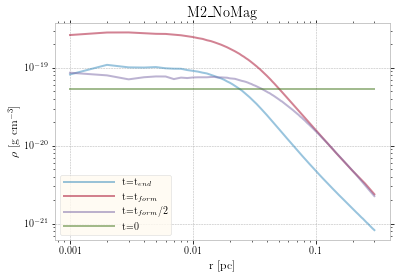

In [23]:
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.style.use("bmh")
plt.style.use(
    {
        "axes.facecolor": "white",
        "xtick.direction": "out",
        "ytick.direction": "out",
        "xtick.top": "True",
        "ytick.right": "True",
    }
)
fig, ax = plt.subplots(1, 1)

xylabels = ["r [pc]", r"$\rho$ [g cm$^{-3}$]"]

plt.title('M2\_NoMag')

from matplotlib.ticker import FuncFormatter




# begin_fit_at_tend

#kwargs = {"label": "fit at t$_{end}$", "alpha": 0.5}
#my_plotter(ax, r, fit_func(x_data, *params), xylabels, **kwargs, linestyle='dashed')

#kwargs = {"label": "t=t$_{end}$", "alpha": 0.5}
#my_plotter(ax, r, x_data, xylabels, **kwargs)

# end_fit_at_tend

kwargs = {"label": "t=t$_{end}$", "alpha": 0.5}
my_plotter(ax, r3, density3, xylabels, **kwargs)

kwargs = {"label": "t=t$_{form}$", "alpha": 0.5}
my_plotter(ax, r2, density2, xylabels, **kwargs)

kwargs = {"label": "t=t$_{form}$/2", "alpha": 0.5}
my_plotter(ax, r1, density1, xylabels, **kwargs)

kwargs = {"label": "t=0", "alpha": 0.5}
my_plotter(ax, r0, density0, xylabels, **kwargs)

#plt.savefig("./density_across_r_plot/fit_at_tend.png", dpi=400, bbox_inches="tight")

plt.savefig("./density_across_r_plot/density_across_r.png", dpi=400, bbox_inches="tight")
plt.savefig("./density_across_r_plot/density_across_r.pdf", dpi=400, bbox_inches="tight")


## fit_at_tend Plot

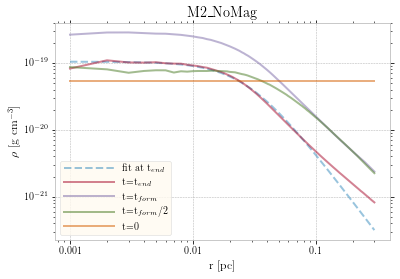

In [24]:
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.style.use("bmh")
plt.style.use(
    {
        "axes.facecolor": "white",
        "xtick.direction": "out",
        "ytick.direction": "out",
        "xtick.top": "True",
        "ytick.right": "True",
    }
)
fig, ax = plt.subplots(1, 1)

xylabels = ["r [pc]", r"$\rho$ [g cm$^{-3}$]"]

plt.title('M2\_NoMag')

# begin_fit_at_tend

kwargs = {"label": "fit at t$_{end}$", "alpha": 0.5}
my_plotter(ax, x_data, fit_func(x_data, *params), xylabels, **kwargs, linestyle='dashed')

kwargs = {"label": "t=t$_{end}$", "alpha": 0.5}
my_plotter(ax, x_data, density, xylabels, **kwargs)

# end_fit_at_tend

#kwargs = {"label": "t=t$_{end}$", "alpha": 0.5}
#my_plotter(ax, r3, density3, xylabels, **kwargs)

kwargs = {"label": "t=t$_{form}$", "alpha": 0.5}
my_plotter(ax, r2, density2, xylabels, **kwargs)

kwargs = {"label": "t=t$_{form}$/2", "alpha": 0.5}
my_plotter(ax, r1, density1, xylabels, **kwargs)

kwargs = {"label": "t=0", "alpha": 0.5}
my_plotter(ax, r0, density0, xylabels, **kwargs)

plt.savefig("./density_across_r_plot/fit_at_tend.png", dpi=400, bbox_inches="tight")
plt.savefig("./density_across_r_plot/fit_at_tend.pdf", dpi=400, bbox_inches="tight")

#plt.savefig("./density_across_r_plot/density_across_r.png", dpi=400, bbox_inches="tight")
